## Citation  
#### Karpukhin, V., Oguz, B., Min, S., Lewis, P., Wu, L., Edunov, S., Chen, D., & Yih, W.-T. (2020). Dense Passage Retrieval for Open-Domain Question Answering. arXiv:2004.04906. https://doi.org/10.48550/arXiv.2004.04906

#### This notebook is a personal explanation and walkthrough of the paper *Dense Passage Retrieval for Open-Domain Question Answering*. All credit for the original research goes to the authors listed above.

**Image Attribution**

#### Unless otherwise noted, all figures in this notebook are either original or sourced from Karpukhin et al., 2020 – *Dense Passage Retrieval for Open-Domain Question Answering*.

# Terminologies before understanding this paper:

##### 1) Question: The input provided by the user.
##### 2) Answer: The correct response to the question.
##### 3) Context: A text snippet which contains answer or helps infer it.
##### 4) Passage: Small, fixed length of text. If answer is present, then it is known as positive. Else, it is known as negative.
##### 5) Document: A full article or page from the Corpus. It is long and needs to be broken into passages for retrieval.
##### 6) Corpus: The full set of documents.

# Problems with Sparse Representation Models

##### Earlier, Open-domain Question Answering is done using Sparse Representation models like TF-IDF. It is used to find the answer to the question by searching the keywords asked in the question. While this is useful, one main problem occurs when the model cannot perform well if the question and the answer in the passage is similar in meaning but uses different words. 

##### For example: 
##### Question: "Who is the bad guy in lord of the rings?”
##### Context: "Sala Baker is best known for portraying the villain Sauron in the Lord of the Rings trilogy"
##### In this case, the sparse representation models may not answer the question from the context. This is because "bad guy" and "villain" have similar meaning but they are different words.

##### Hence, Sparse Models depend on the exact word and struggles with synonyms.

# How Dense Passage Retrieval solves the issue faced by Sparse Representation Models?

##### Dense Passage Retrieval (DPR) is a dense representation of the passage. The main goal of Open Quetion-answering is two parts: Retrieval and Reader. Retrieval is the part which searches or retrieves the top k relevent passages and the reader reads each passage for giving  answer. DPR is a retriever. DPR retrieves top k passages from M passages. In this paper, M = 21 million and k is between 20 and 100. 

##### Dense Passage Retriever uses two BERT models - one for Passage (E_P) and one for question (E_Q). Each passage give a 768-dimension representation vector. Each vector is then stored as index. When a question is asked, it passes through the Encoder (E_Q) which gives 768-dimension representation vector for the question. This question vector is then used to find the top k similar passages through the index.

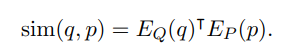

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/similarity.png')

##### To find how close or similar the meanings of two words are, we can use simlarity. It's just the dot product of the question and passage vectors. This is useful because with this, we can find the meanings of words which has similar meaning but are different words like 'bad guy' and 'villain' in the example above. The dot product works because, it the words have similar meaning, their scores are high.

# Training

##### The passage which contains the answer is called a positive passage and the passage which doesn't contain the answer is called a negative passage. During the training phase, we take one positive passage and n negative passages, then perform a similarity score between them. Then we use negative log likelihood loss. Let's look at the loss function:

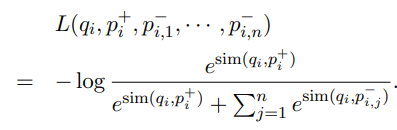

In [3]:
%matplotlib inline
from IPython.display import Image
Image('Images/Loss function.png')

##### As we can see, we have one positive passage (p_i+) and n negative passages (p_i,n-). The log takes softmax output as input. Since, softmax gives probabilities, we can use log so that when softmax is 1, we can use log(1) which is 0 which means the loss is 0. We use negative log because the log function is <= 0. So, the negative passages will have lower scores than positive passage. Hence, we use the negative sign. This ensures that the log likehihood is maximised while the negative log-likelihood is minimized. 

# Result

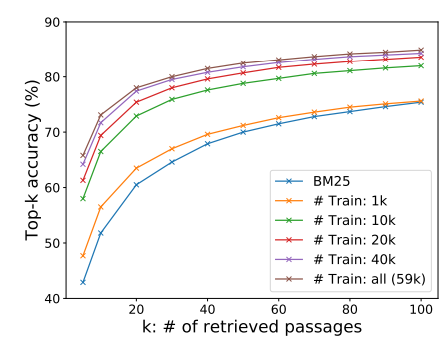

In [4]:
%matplotlib inline
from IPython.display import Image
Image('Images/result.png')

##### As we can see, the Top-k Accuracy increases as we increase the value of k. In other words, retrieving top k1 passages has higher chance of finding an answer than retrieving top k passages where k<k1. But as we can see, there is a saturation point wherein, if we keep increasing the value of k, the accuracy might not increase much. 

# Conclusion

##### There are two options for finding answers from the given M passages. One is to read the passage one by one. This is highly inefficient because reading each passage takes so much time. The other approach is to retrieve top k passages + read those top k passages. This is faster because we index the encoded passages. So, given a question, we encode the meaning of the question and then perform similarity search with all the encoded passages and then retrieve the top k passages. This is how Dense Passage Retriever (DPR) works. As the number of retrieved passages increase, the accuracy increase but there is a saturation point where even if we increase the k, the accuracy might not increase much.